# Welcome to our Linear Regression Workshop!

In this notebook, we will explore **Linear Regression** using a real-world dataset: **Auto MPG**.

We will:
- Understand the concept of linear regression
- Implement linear regression from scratch
- Apply it to the **Auto MPG dataset** to predict a car's fuel efficiency (**miles per gallon - MPG**)
- Evaluate the performance of our model using appropriate metrics

Let's get started!

First, let us understand what "regression" and "linear regression" mean.


## Regression

- Regression is a statistical technique that relates a dependent variable (denoted as Y) to one or more independent variables (denoted as X).

- Regression models are able to show whether the changes observed in the dependent variable are associated with changes in the independent variables.

- There are many different regression models, such as "linear regression", "logistic regression", "polynomial regression", "ridge regression", and "lasso regression", and many others.

- In this notebook, we will focus on linear regression, which models the relationship between one dependent variable and one or more independent variables using a straight line, hence the name "linear" regression.


### Linear Regression

- Linear regression functions are of the form `Y = wX + b`, where

  `Y`: dependent variable vector, what we are trying to guess

  `w`: weight vector, the importance of each independent variable. We will refer to weights as `coefficients` in this workshop, to make the code more understandable.

  `X`: independent variable vector, what we base our predictions on

  `b`: bias, helps with fitting the model better. We will refer to bias as `intercept` in this workshop, again to make the code more understandable.

- The purpose of `finding` the most accurate model requires us to find the best parameters `w` and `b` such that our regression line is a perfect fit for our dataset. That is, we try many many many different `w` and `b` values to find the line that helps us the most. But how do we find them?


### Mean Squared Error (MSE)

- MSE is a very common measure of the quality of an estimator. It's used to evaluate the accuracy of a linear regression model by calculating the average of the squares of the errors (difference between actual and predicted results).

- Formula:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$

- The end goal is to minimize MSE to improve the accuracy of the model.


### Gradient Descent

- Gradient Descent is an optimization algorithm used to minimize the cost function (MSE in our case), by iteratively adjusting model parameters. The update rule for each parameter $\theta$ is:

$$
\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
$$

where

$$
$$

- $\theta$ : the parameter we are trying to optimize (w or b for linear regression)

- $\alpha$ : learning rate, a hyperparameter that determines the step size at each iteration while moving toward a minimum cost function. Small alpha ensures more precise updates, but training will take more time with smaller alpha (since changes will be very minimal, but very accurate).

- $J(\theta)$ : the cost function, MSE in our case.

- $\frac{\partial J(\theta)}{\partial \theta}$ : Gradient of the cost function with respect to the parameter. It measures how much J changes with a small change in $\theta$. The gradient points in the direction of the steepest increase of the cost function.


### Now that we know what linear regression looks like, let us start implementing it using Python!


Let's import the necessary libraries first.


In [1]:
%pip install joblib matplotlib numpy scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import joblib

Now, let's implement the Linear Regression class using Python together!


In [3]:
# noinspection PyShadowingNames
from sklearn.base import BaseEstimator, RegressorMixin

class LinearRegression(BaseEstimator, RegressorMixin):
    def __init__(
            self,
            method="gradient_descent",
            learning_rate=0.01,
            epochs=1000,
            regularization=None,
            alpha=0.01,
            momentum=0.9
    ):
        self.coefficients = None
        self.intercept = None
        self.method = method
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization = regularization
        self.alpha = alpha  # Regularization strength
        self.momentum = momentum  # Momentum factor

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)  # Ensure y is a column vector

        if self.method == "normal_equation":
            self._fit_normal_equation(X, y)
        elif self.method == "gradient_descent":
            self._fit_gradient_descent(X, y)
        else:
            raise ValueError("Method must be 'normal_equation' or 'gradient_descent'")

    def _fit_normal_equation(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        if self.regularization == "ridge":
            L = self.alpha * np.eye(X_b.shape[1])
            L[0, 0] = 0  # Do not regularize the intercept term
            theta_best = np.linalg.inv(X_b.T.dot(X_b) + L).dot(X_b.T).dot(y)
        else:
            theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept = theta_best[0, 0]
        self.coefficients = theta_best[1:].flatten()

    def _fit_gradient_descent(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        m = len(y)
        theta = np.random.randn(X_b.shape[1], 1)
        velocity = np.zeros_like(theta)

        for epoch in range(self.epochs):
            gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
            if self.regularization == "ridge":
                regularization_term = self.alpha * np.r_[np.zeros((1, 1)), theta[1:]]
                gradients += 2 * regularization_term

            velocity = self.momentum * velocity - self.learning_rate * gradients
            theta += velocity

        self.intercept = theta[0, 0]
        self.coefficients = theta[1:].flatten()

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(np.r_[self.intercept, self.coefficients])

    def score(self, X, y):
        """
        Scoring function required for hyperparameter tuning (uses R2 score).
        """
        y_pred = self.predict(X)
        return self.r2_score(y, y_pred)

    @staticmethod
    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    @staticmethod
    def r2_score(y_true, y_pred):
        total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
        explained_variance = np.sum((y_true - y_pred) ** 2)
        return 1 - explained_variance / total_variance


This class definition for Linear Regression covers everything we have discussed in theory, and further implements other metrics for accuracy calculations and optimizations.


## About the Dataset

We will use the **Auto MPG dataset**, which contains information about different car models from the 1970s and 1980s.
Our goal is to predict **MPG (miles per gallon)** based on various car attributes.

### Features:
- `horsepower`: Engine power of the car
- `weight`: Weight of the vehicle
- `acceleration`: Acceleration capability
- `cylinders`: Number of cylinders in the engine

### Target Variable:
- `mpg`: Miles per gallon (fuel efficiency), which we are trying to predict.

### Why this dataset?
- It provides a **clear linear relationship** between features and the target variable.
- It's a **real-world problem** that showcases how linear regression can be used in automotive efficiency analysis.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Auto MPG dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
auto_mpg = pd.read_csv(url)

# Drop missing values
auto_mpg = auto_mpg.dropna()

# Select features and target
X = auto_mpg[["horsepower", "weight", "acceleration", "cylinders"]]
y = auto_mpg["mpg"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display dataset info
print(auto_mpg.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [5]:
print(auto_mpg.info())  # see the official description of our dataset

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB
None


Now let us visualize the data to understand it better.


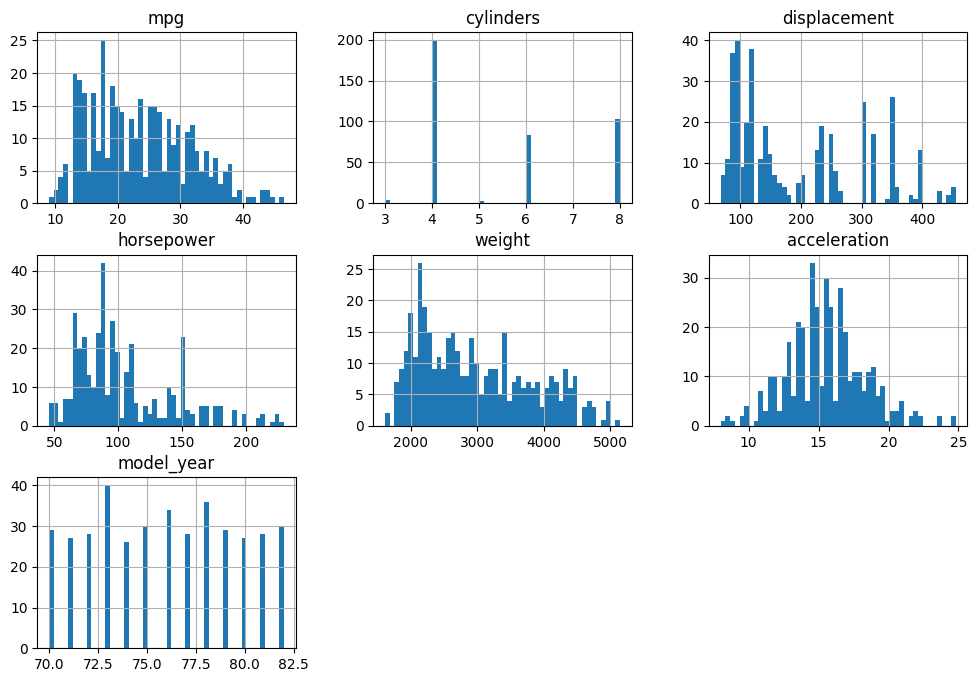

In [6]:
auto_mpg.hist(bins=50, figsize=(12, 8))
plt.show()

From the above histograms of the different features, we can conclude that:

1. Features are distributed on very different scales

For better accuracy, we should preprocess those features. We can either perform feature engineering or clean those problematic instances.


Now we plot the relationship between the target variable `mpg` and the features to understand the data better.


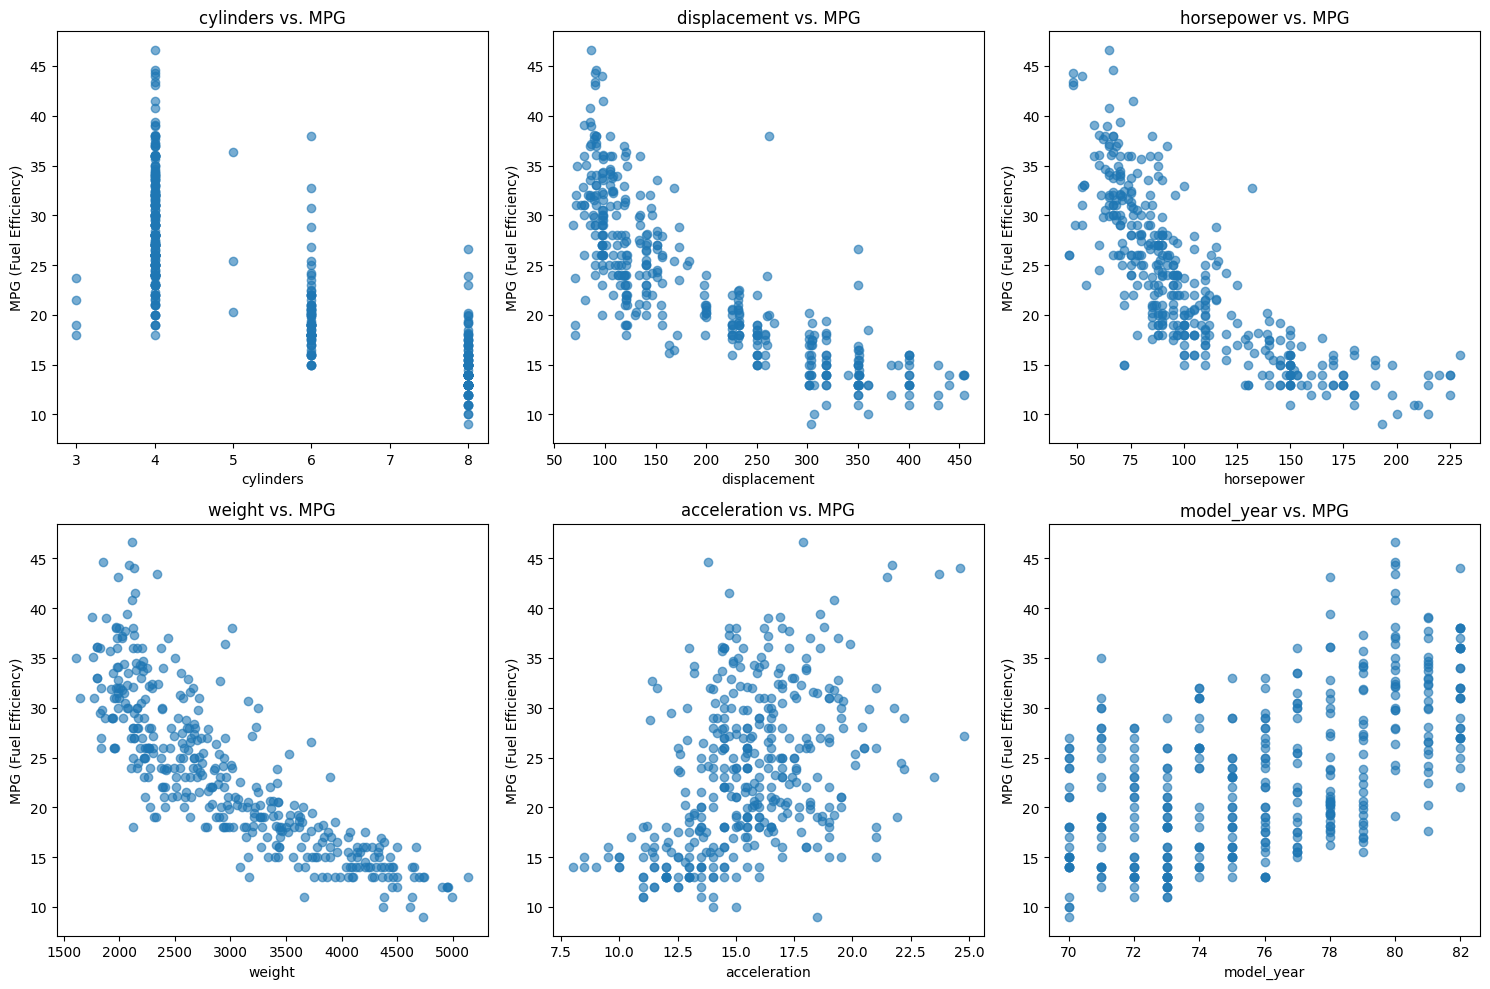

In [7]:
# First, get rid of the non-numeric columns, origin and name because they are not useful for our regression model.
auto_mpg = auto_mpg.drop(columns=["origin", "name"])

features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    axes[row, col].scatter(auto_mpg[feature], auto_mpg["mpg"], alpha=0.6)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("MPG (Fuel Efficiency)")
    axes[row, col].set_title(f"{feature} vs. MPG")

plt.tight_layout()
plt.show()


Now let's see the correlations of other variables with MPG. The values range from -1 to 1. A value of 1 means a perfect positive correlation, and a value of -1 means a perfect negative correlation.

In [8]:
corr = auto_mpg.corr()
corr["mpg"].sort_values(ascending=True)

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
model_year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

As we can see, `weight`, `displacement`, and `horsepower` have a strong negative correlation, and `model_year` has the highest positive correlation with `mpg`.


Now that we have observed our dataset, let's preprocess it and split it into training and testing sets. Let's first validate data by checking for missing values, and type of data in each column.


In [9]:
print("Check for NA / NaN values")
print("------------------------")
print(auto_mpg.isna().sum())
print("------------------------")
print("Check the datatype of each column")
print(auto_mpg.dtypes)

Check for NA / NaN values
------------------------
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64
------------------------
Check the datatype of each column
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
dtype: object


We see that there are no missing values in the dataset, and all columns are numerical. Now let's split the data into training and testing sets.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = auto_mpg.drop("mpg", axis=1)  # dropping target column
y = auto_mpg["mpg"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Now the fun part, generate an instance of our Linear Regression model and train it on the training data.


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1],  # Try different learning rates
    "epochs": [1000, 2000, 5000],  # Try different epochs
    "regularization": [None, "ridge"],  # Try Ridge regularization
    "alpha": [0.001, 0.01, 0.1, 1],  # Ridge alpha values
    "momentum": [0.5, 0.9, 0.99],  # Different momentum values
}

# Perform Grid Search
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the best model
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV] END alpha=0.001, epochs=1000, learning_rate=0.001, momentum=0.5, regularization=None; total time=   0.0s
[CV] END alpha=0.001, epochs=1000, learning_rate=0.001, momentum=0.5, regularization=None; total time=   0.0s
[CV] END alpha=0.001, epochs=1000, learning_rate=0.001, momentum=0.5, regularization=None; total time=   0.0s
[CV] END alpha=0.001, epochs=1000, learning_rate=0.001, momentum=0.5, regularization=ridge; total time=   0.0s
[CV] END alpha=0.001, epochs=1000, learning_rate=0.001, momentum=0.5, regularization=ridge; total time=   0.0s
[CV] END alpha=0.001, epochs=1000, learning_rate=0.001, momentum=0.5, regularization=ridge; total time=   0.0s
[CV] END alpha=0.001, epochs=1000, learning_rate=0.001, momentum=0.9, regularization=None; total time=   0.0s
[CV] END alpha=0.001, epochs=1000, learning_rate=0.001, momentum=0.9, regularization=None; total time=   0.0s
[CV] END alpha=0.001, epochs=1000, learning_rate=0.00

In [12]:
model = LinearRegression(
    method="gradient_descent",
    learning_rate=best_params["learning_rate"],
    epochs=best_params["epochs"],
    regularization=best_params["regularization"],
    alpha=best_params["alpha"],
    momentum=best_params["momentum"],
)

In [13]:
model.fit(X_train, y_train)

Now that we have trained our model, let's evaluate its performance on the testing data.


In [14]:
predictions = model.predict(X_test)
mse = model.mean_squared_error(y_test, predictions)
r2 = model.r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 10.45862399059303
R2 Score: 0.7950919968636979


~80% accuracy is not bad for a simple linear regression model!


Let's see our regression line and the actual data points on the graph.


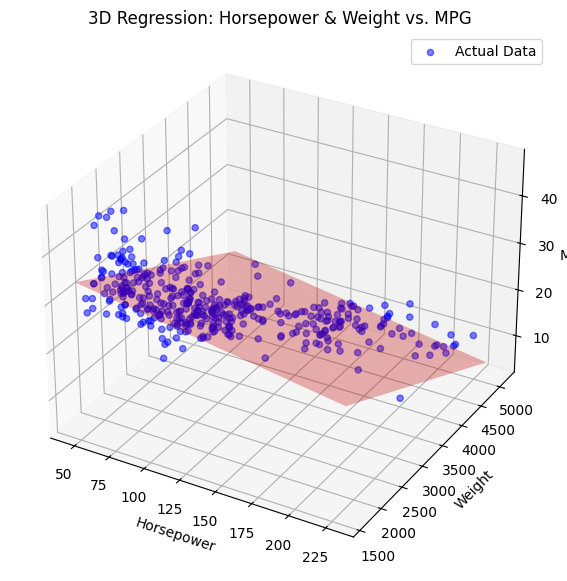

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import numpy as np

# Select two strong predictors based on heatmap
X = auto_mpg[["horsepower", "weight"]].values
y = auto_mpg["mpg"].values

# Train model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z_pred = model.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()]).reshape(x_mesh.shape)

# Plot 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter actual data points
ax.scatter(X[:, 0], X[:, 1], y, color="blue", alpha=0.5, label="Actual Data")

# Plot regression surface
ax.plot_surface(x_mesh, y_mesh, z_pred, color="red", alpha=0.3)

# Labels
ax.set_xlabel("Horsepower")
ax.set_ylabel("Weight")
ax.set_zlabel("MPG")
ax.set_title("3D Regression: Horsepower & Weight vs. MPG")

plt.legend()
plt.show()


We can improve our model by using more advanced regression techniques, such as polynomial regression, ridge regression, or lasso regression. We can also try to preprocess our data more effectively to remove outliers and scale our features. In the next workshop, we will discuss these techniques and how to implement them using Python, and see if we can achieve more accurate predictions.